In [10]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [11]:

data = {
    "Brand": ["Toyota", "BMW", "Honda", "Audi", "Ford", "BMW", "Toyota", "Audi", "Honda", "Ford"] * 10,
    "Horsepower": np.random.randint(70, 400, 100),
    "Mileage": np.random.randint(5, 25, 100),   # km per litre
    "Age": np.random.randint(1, 15, 100),       # age in years
    "Goodwill": np.random.randint(1, 10, 100)   # brand goodwill (1=low, 10=high)
}

df = pd.DataFrame(data)
# Target variable: Car Price (synthetic formula with noise)
np.random.seed(42)
df["Price"] = (
    df["Horsepower"] * 150 +
    df["Goodwill"] * 1000 -
    df["Age"] * 500 -
    df["Mileage"] * 200 +
    np.random.randint(-5000, 5000, size=100)
)

print("Dataset Preview:\n", df.head())

Dataset Preview:
     Brand  Horsepower  Mileage  Age  Goodwill  Price
0  Toyota          97       10   12         5  13820
1     BMW         204        8   13         1  19360
2   Honda         270       15    3         8  44390
3    Audi         397       21    4         5  58541
4    Ford         337       10    3         5  52784


In [12]:

X = df.drop("Price", axis=1)
y = df["Price"]

In [13]:

numeric_features = ["Horsepower", "Mileage", "Age", "Goodwill"]
categorical_features = ["Brand"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(), categorical_features)
    ]
)

In [14]:

linreg_model = Pipeline(steps=[("preprocessor", preprocessor),
                               ("regressor", LinearRegression())])

rf_model = Pipeline(steps=[("preprocessor", preprocessor),
                           ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))])


In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Horsepower', 'Mileage',
                                                   'Age', 'Goodwill']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Brand'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [16]:

y_pred_lin = linreg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [17]:

def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n📊 {model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

evaluate_model(y_test, y_pred_lin, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


📊 Linear Regression Performance:
MAE: 2369.39
RMSE: 2670.44
R² Score: 0.96

📊 Random Forest Performance:
MAE: 3253.48
RMSE: 3854.12
R² Score: 0.93


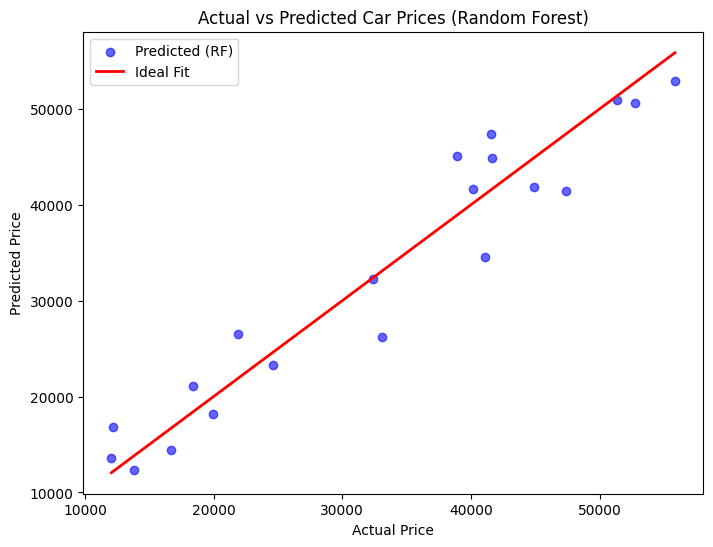

In [18]:

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, color="blue", alpha=0.6, label="Predicted (RF)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2, label="Ideal Fit")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices (Random Forest)")
plt.legend()
plt.show()